# 0.引入所需模組與必要的資料集

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
import warnings

In [2]:
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(font_scale=1.56)

In [3]:
df_test = pd.read_csv('../../data/kaggle_titanic/test.csv')
df_train = pd.read_csv('../../data/kaggle_titanic/train.csv')#data
df_data = df_train.append(df_test)

# 1.查看資料

探索性分析EDA:  
模型考慮：抗噪強的(svm,knn,隨機森林)  
廣泛性：對小資料集來說三個都可以，但隨機森林可以平行化  
預處理：svm,knn分別超平面跟鄰近投票，但不如隨機森林用gini不純度簡便  

In [ ]:
def DatasetsInfo(train_data,test_data):
    df_train.info()
    print("-" * 40)
    df_test.info()
DatasetsInfo(df_train,df_test)

In [ ]:
print(df_train.describe())
print("-" * 40)
print(df_train.describe(include=['O']))

In [ ]:
def DatasetMissingPercentage(data):
    return pd.DataFrame({'DataMissingPercentage':data.isnull().sum() * 100 / len(df_train)})

DatasetMissingPercentage(df_train)

In [ ]:
DatasetMissingPercentage(df_test)

In [4]:
df_train.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

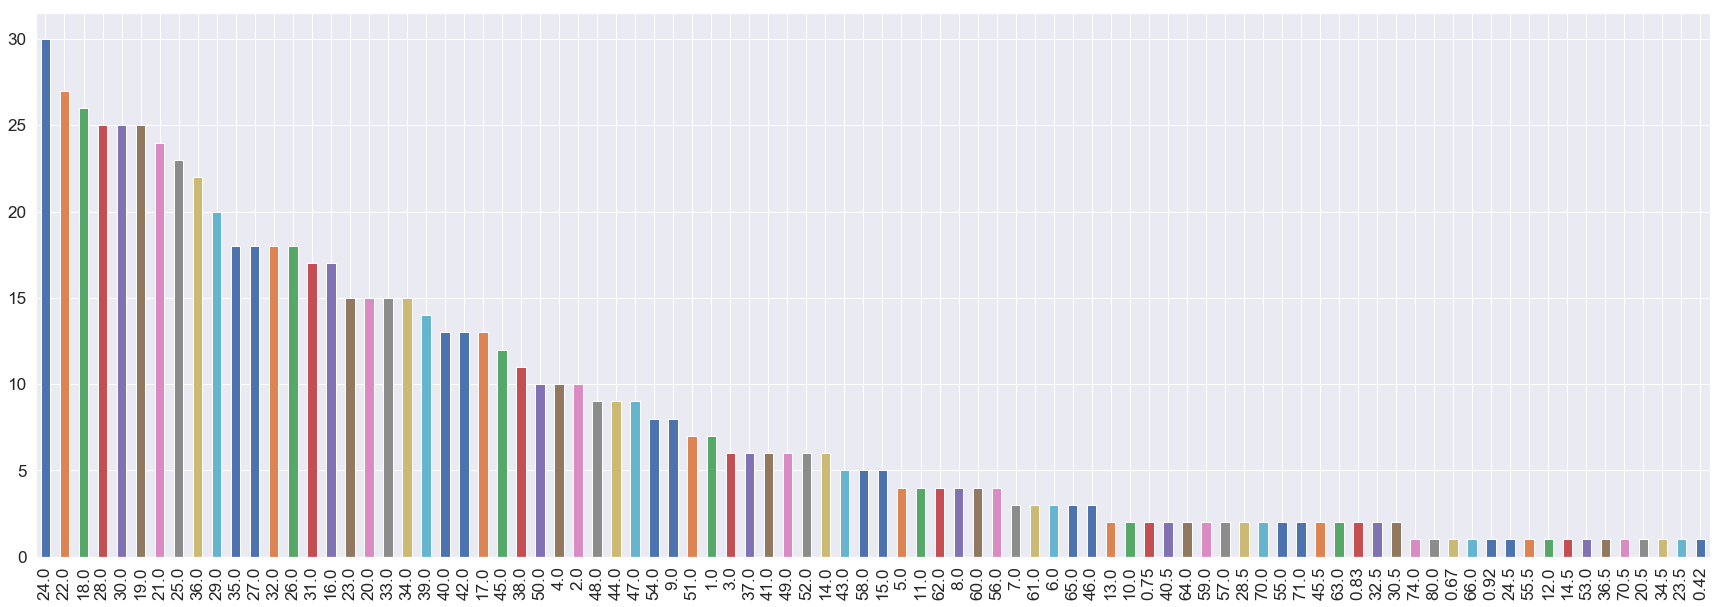

In [5]:
age_unique = df_train[df_train.Age >=0]
plt.figure(figsize=(30,10))
age_unique.Age.sort_values().value_counts().plot(kind="bar")
plt.show()

In [6]:
def DatasetUniquePercentage(data):
    return pd.DataFrame({'percent_unique':data.apply(lambda x: x.unique().size/x.size*100)})

DatasetUniquePercentage(df_train)

,percent_unique
PassengerId,100.000000
Survived,0.224467
Pclass,0.336700
Name,100.000000
Sex,0.224467
Age,9.988777
SibSp,0.785634
Parch,0.785634
Ticket,76.430976
Fare,27.833895


In [7]:
DatasetUniquePercentage(df_test)

,percent_unique
PassengerId,100.000000
Pclass,0.717703
Name,100.000000
Sex,0.478469
Age,19.138756
SibSp,1.674641
Parch,1.913876
Ticket,86.842105
Fare,40.669856
Cabin,18.421053


# 2.分析資料

## 基礎分析

In [ ]:
print('Id is unique.') if df_train.PassengerId.nunique() == df_train.shape[0] else print('oops')
print('Train and test sets are distinct.') if len(np.intersect1d(df_train.PassengerId.values, df_test.PassengerId.values))== 0 else print('oops')#0表示train,test dataset資料一致
#查看資料是否有nan並設置datasetHasNan flag   
if df_train.count().min() == df_train.shape[0] and df_testset.count().min() == df_testset.shape[0] :
    print('We do not need to worry about missing values.') 
else:
    nas = pd.concat([df_train.isnull().sum(), df_test.isnull().sum()], axis=1, keys=['Train Dataset', 'Test Dataset']) 
    print('Nan in the data sets')
    print(nas[nas.sum(axis=1) > 0])

## 相關性分析

In [ ]:
# Sex vs Survived
print(df_train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print()
# Class vs Survived，存活率高到低，P1,P2,P3  
print(df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print()
# Sex and Class vs Survived
print(df_train[['Sex', 'Pclass', 'Survived']].groupby(['Sex', 'Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print()
# SibSp vs Survived
print(df_train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print()
# Parch vs Survived
print(df_train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print()
# Family vs Survived
df_train['Family'] = df_train['SibSp'] + df_train['Parch']
print(df_train[['Family', 'Survived']].groupby(['Family'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print()
# Embark vs Survived
print(df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print()

In [ ]:
sns.countplot(x='Survived',data=df_train)
sns.countplot(x='Survived',hue='Sex',data=df_train)
sns.countplot(x='Survived',hue='Pclass',data=df_train)
sns.countplot(x='SibSp',data=df_train)
df_train['Fare'].plot.hist()
df_train.hist(figsize=(12,10))
plt.figure()

In [8]:
#age
print('Oldest Passenger was of:',df_train['Age'].max(),'Years')
print('Youngest Passenger was of:',df_train['Age'].min(),'Years')
print('Average Age on the ship:',df_train['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


In [9]:
total=df_train.isnull().sum()
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_df_train = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_df_train.head(13)

,Total,Percent
Age,177,0.198653
Cabin,687,0.771044
Embarked,2,0.002245
Fare,0,0.000000
Name,0,0.000000
Parch,0,0.000000
PassengerId,0,0.000000
Pclass,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000


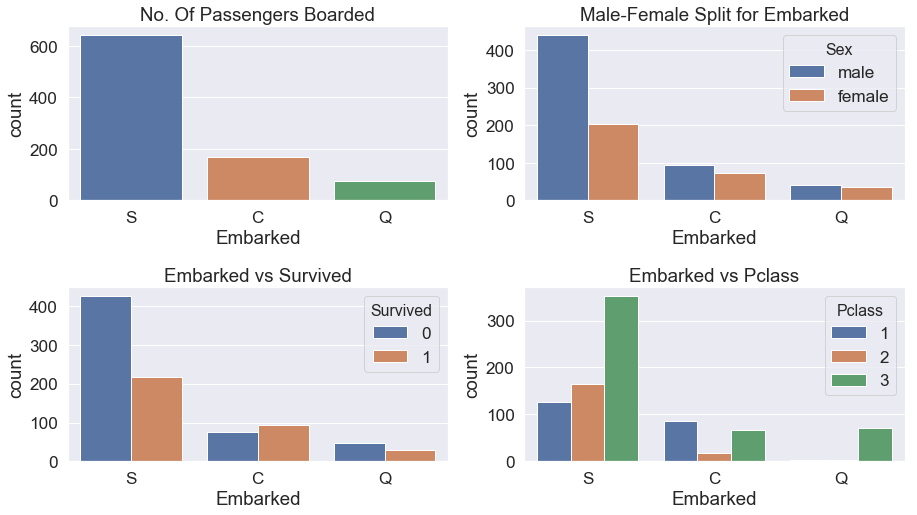

In [10]:
f,ax=plt.subplots(2,2,figsize=(15,8))
sns.countplot('Embarked',data=df_train,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=df_train,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=df_train,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=df_train,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

In [ ]:
df_data.corr()

1.大部分男生都死了，大部分女生活下來  
2.階級跟存活率成正比
3.最低艙等女性存活率還是比最高艙等男性高  
4.旁系血親1個存活率最高   
5.直系血親3個存活率最高  
6.如果加總，有3個親友存活率高  
7.船艙存活率C>Q>S  

In [ ]:
def FeatureCorreate(datasets,dropData):
    sns.set(context="paper", font="monospace")
    sns.set(style="white")
    f, ax = plt.subplots(figsize=(10,6))
    train_corr = datasets.drop(dropData,axis=1).corr()
    sns.heatmap(train_corr, ax=ax, vmax=.9, square=True)
    ax.set_xticklabels(train_corr.index, size=15)
    ax.set_yticklabels(train_corr.columns[::-1], size=15)
    ax.set_title('Feature Corr', fontsize=20)
print("Train Features")
FeatureCorreate(df_train,'PassengerId')

# 3.特徵工程

## cabin處理

In [11]:
df_train.head()#cabin 資料太少一般是要拿掉，但是有值得分析的

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df_train.drop('Cabin',axis=1,inplace=True)

In [13]:
df_train.dropna(inplace=True)

## 數值化

In [14]:
#df_df_train['Sex_Code'] = df_df_train['Sex'].map({'female' : 1, 'male' : 0}).astype('int')f
gender=pd.get_dummies(df_train['Sex'],drop_first=True)

embarked=pd.get_dummies(df_train['Embarked'],drop_first=True)

pcl=pd.get_dummies(df_train['Pclass'],drop_first=True)

In [15]:
data=pd.concat([df_train,gender,embarked,pcl],axis=1)

In [16]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


## drop datas

In [17]:
data.drop(['Pclass','Sex','PassengerId','Name','Ticket'],axis=1,inplace=True)#ticket之後可以研究
data.drop(['Age','Fare','Embarked'],axis=1,inplace=True)
data.head()

,Survived,SibSp,Parch,male,Q,S,2,3
0,0,1,0,1,0,1,0,1
1,1,1,0,0,0,0,0,0
2,1,0,0,0,0,1,0,1
3,1,1,0,0,0,1,0,0
4,0,0,0,1,0,1,0,1


# 4.建模,訓練,預測

In [18]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [19]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

In [20]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy is  0.8271028037383178


In [21]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.8177570093457944


In [22]:
td=df_test

In [23]:
td['Age'].fillna(td.Age.mean(),inplace=True)
td.drop('Cabin',axis=1,inplace=True)

In [24]:
td=td.fillna(td.mean()).copy()
td.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q


<Figure size 432x288 with 0 Axes>

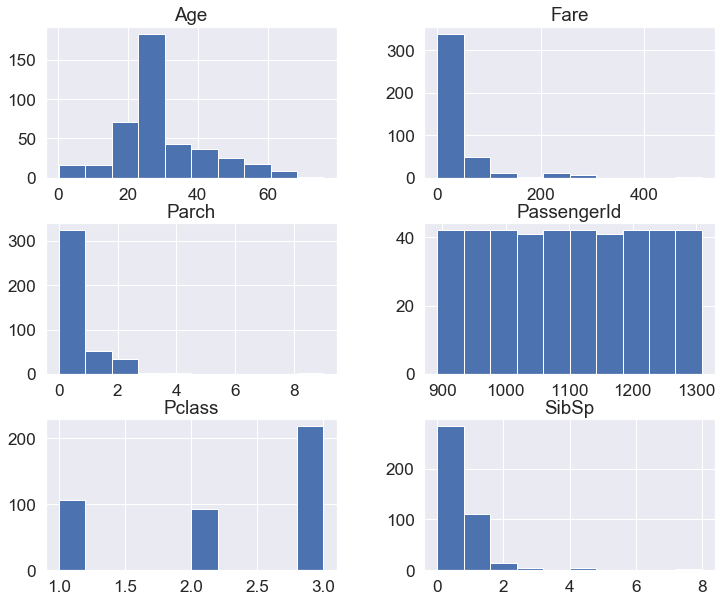

<Figure size 432x288 with 0 Axes>

In [26]:
td.hist(figsize=(12,10))
plt.figure()

In [27]:
td.drop(['Name','Embarked','Sex'],axis=1,inplace=True)

In [28]:
pcl=pd.get_dummies(td['Pclass'],drop_first=True)
pcl.head()

,2,3
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1


In [29]:
td=pd.concat([td,pcl],axis=1)

In [30]:
td.drop(['Ticket','Pclass'],axis=1,inplace=True)
td.head(3)

,PassengerId,Age,SibSp,Parch,Fare,2,3
0,892,34.5,0,0,7.8292,0,1
1,893,47.0,1,0,7.0000,0,1
2,894,62.0,0,0,9.6875,1,0


In [31]:
y_pred=model.predict(td)

In [32]:
sub=pd.DataFrame({
          'PassengerId':td['PassengerId'],
           'Survived':y_pred
})
sub.head(10)

,PassengerId,Survived
0,892,1
1,893,0
2,894,1
3,895,1
4,896,0
5,897,1
6,898,1
7,899,0
8,900,1
9,901,0


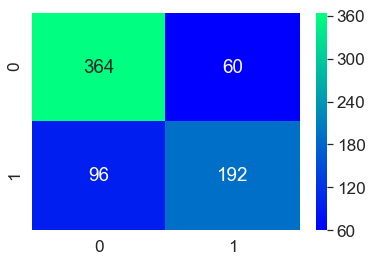

In [33]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

# 5.產生csv上傳

In [34]:
sub.to_csv("Submit.csv",index=False)

# 6.參考資料

https://www.kaggle.com/rajeshjnv/titanic-top-2-survival-predictions?scriptVersionId=9543188